# ROCKET

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier


In [2]:
data = pd.read_csv("https://docs.google.com/spreadsheets/d/18mzp6f9xZm0J4rfoAuJ_Xu-gzVDjjkc1oMTMW10QGEQ/gviz/tq?tqx=out:csv&sheet=Flight")


In [3]:
data.head()

,Person,Item_Identifier,Length,Breadth,PaperQuality,Angle,Foldings,Windspeed,Dominanthand,Distance
0,Kevin,Som,29.0,20.0,A,U,8,On,L,5
1,Kevin,kevin,23.0,16.0,B,U,8,On,L,5
2,Kevin,RR,NaN,18.0,A,L,10,On,R,6
3,Priya,Nithya,27.0,20.0,A,U,10,On,R,4
4,Priya,Priya,29.5,17.5,B,U,5,Off,R,8


In [4]:
data.isnull().sum()

Person              0
Item_Identifier     0
Length             17
Breadth             0
PaperQuality        8
Angle               4
Foldings            0
Windspeed           0
Dominanthand        0
Distance            0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x24ae432e220>,
 'caps': [<matplotlib.lines.Line2D at 0x24ae432e880>,
 'boxes': [<matplotlib.lines.Line2D at 0x24ae3c6ed90>],
 'medians': [<matplotlib.lines.Line2D at 0x24ae432efa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24ae433a370>],
 'means': []}

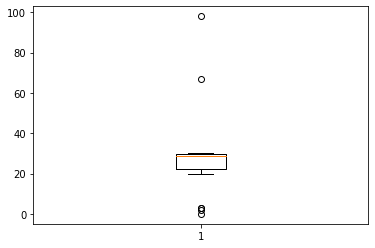

In [5]:
plt.boxplot(data.Length.dropna())

In [6]:
data.Length.fillna(data.Length.median(),inplace=True)

In [7]:
q3 = data.Length.quantile(0.75)
q3

29.5

In [8]:
q1 = data.Length.quantile(0.25)
q1

24.5

In [9]:
IQR = q3 - q1
IQR

5.0

In [10]:
UE = q3 + (1.5 * IQR)
UE

37.0

In [11]:
LE = q1 - (1.5 * IQR)
LE

17.0

In [12]:
data1 = data[(data.Length <= UE) & (data.Length >= LE)]

{'whiskers': [<matplotlib.lines.Line2D at 0x24ae44279d0>,
 'caps': [<matplotlib.lines.Line2D at 0x24ae4433130>,
 'boxes': [<matplotlib.lines.Line2D at 0x24ae4427640>],
 'medians': [<matplotlib.lines.Line2D at 0x24ae44337c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24ae4433b50>],
 'means': []}

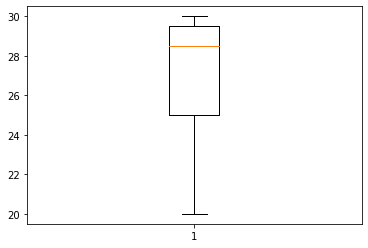

In [13]:
plt.boxplot(data1.Length)

In [14]:
data.Angle.fillna(data.Angle.mode().max(),inplace=True)

In [15]:
data.PaperQuality.fillna("others",inplace=True)

In [16]:
y = data.Distance
x = data.iloc[0:,[2,3,4,5,6,7,8]]

In [17]:
x.head()

,Length,Breadth,PaperQuality,Angle,Foldings,Windspeed,Dominanthand
0,29.0,20.0,A,U,8,On,L
1,23.0,16.0,B,U,8,On,L
2,28.5,18.0,A,L,10,On,R
3,27.0,20.0,A,U,10,On,R
4,29.5,17.5,B,U,5,Off,R


In [18]:
dummy = pd.get_dummies(x)

In [19]:
scaler = MinMaxScaler()

In [20]:
scaler.fit(dummy)

MinMaxScaler()

In [21]:
d = scaler.transform(dummy)

In [22]:
df = pd.DataFrame(d)

In [23]:
trainx,testx = train_test_split(df,test_size = 0.2)
trainy,testy = train_test_split(y,test_size = 0.2)

In [24]:
Decision = DecisionTreeRegressor(random_state=0)

In [25]:
Decision.fit(trainx,trainy)

DecisionTreeRegressor(random_state=0)

In [26]:
Decision.predict(testx)

array([7.5       , 6.        , 6.        , 5.        , 5.75      ,
       4.5       , 7.5       , 6.33333333, 6.75      , 5.        ,
       7.5       , 6.        , 5.        , 6.66666667, 6.        ,
       3.        , 6.66666667, 4.5       ])

In [27]:
Decision.score(testx,testy)

-0.9951512800620634

In [28]:
 Linear = LinearRegression()

In [29]:
Linear.fit(trainx,trainy)

LinearRegression()

In [30]:
Linear.predict(testx)

array([7.17415781, 6.14958279, 6.14958279, 4.60570677, 6.78280404,
       4.33508782, 6.73577096, 4.93969693, 5.94217035, 4.60570677,
       6.73577096, 7.15729825, 4.60570677, 6.74134789, 7.15729825,
       4.94190847, 6.42627376, 4.33508782])

In [31]:
Linear.score(testx,testy)

-0.7160579587393643

In [32]:
Tree = DecisionTreeClassifier(random_state=0).fit(trainx,trainy)

In [33]:
Tree.score(testx,testy)

0.1111111111111111

In [34]:
Tree.predict(testx)

array([6, 5, 5, 4, 6, 3, 5, 5, 5, 4, 5, 6, 4, 5, 6, 4, 6, 3], dtype=int64)